In [4]:
import pandas as pd
import numpy as np
import pandas_profiling
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns

In [5]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')

In [6]:
movies_df.columns = ['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore']

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank           1000 non-null int64
Title          1000 non-null object
Genre          1000 non-null object
Description    1000 non-null object
Director       1000 non-null object
Actors         1000 non-null object
Year           1000 non-null int64
Runtime        1000 non-null int64
Rating         1000 non-null float64
Votes          1000 non-null int64
Revenue        872 non-null float64
Metascore      936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [8]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


**Observations:**
We have movies data ranging from 2006 to 2016. Minimum movie length is 66 mins and maximum movie length is 191 mins. Few rows are missing Revenue and MetaScore data.

In [9]:
# Missing values in each column
movies_df.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [10]:
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [11]:
# Pre processing profile
profile = pandas_profiling.ProfileReport(movies_df)
profile.to_file(outputfile="profile_report_preprocessing.html")

In [12]:
# Replacing Metascore and Revenue missing values
median_metascore = movies_df['Metascore'].median()
median_revenue = movies_df['Revenue'].median()
#print(median_metascore)
#print(median_revenue)

movies_df.Metascore.fillna(median_metascore, inplace=True)
movies_df.Revenue.fillna(median_revenue, inplace=True)

In [13]:
# Finding list of unique Genres

#import pdb

unique_genre_list = set()

def genreToList(genre):
    #pdb.set_trace()
    for item in genre.split(','):
        #pdb.set_trace()
        unique_genre_list.add(item)
        #pdb.set_trace()
movies_df['Genre'].apply(genreToList)

print('Unique Genre Items = ', len(unique_genre_list))
print(unique_genre_list)


Unique Genre Items =  20
{'Action', 'Sci-Fi', 'Music', 'Family', 'Musical', 'Horror', 'Animation', 'Sport', 'Western', 'War', 'Adventure', 'Drama', 'Comedy', 'Biography', 'Romance', 'History', 'Crime', 'Thriller', 'Fantasy', 'Mystery'}


In [14]:
# Finding list of unique Actors

#import pdb

#unique_actor_list = []
unique_actor_list = set()

def actorsToList(actor):
    #pdb.set_trace()
    for item in actor.split(','):
        #pdb.set_trace()
        unique_actor_list.add(item) #  total 2394
        #unique_actor_list.append(item) # total 3999
        #pdb.set_trace()
movies_df['Actors'].apply(actorsToList)

print('Unique Actor Items = ', len(unique_actor_list))
print(unique_actor_list)


Unique Actor Items =  2394
{' Lara Pulver', ' Jordan Peele', 'Thomas Loibl', ' Val Kilmer', 'Daniel Fathers', ' Amber Heard', ' John Boyega', ' Scarlett Johansson', ' Angelina Jolie', ' Ashley C. Williams', 'Kim Coates', 'Brian Dennehy', ' Sigourney Weaver', 'Naomi Watts', ' Kate Winslet', ' Charlotte Le Bon', ' Bill Hader', ' Peter Facinelli', ' Matt Bomer', 'Dustin Hoffman', 'Daisy Ridley', ' Bruce Greenwood', 'Aidan Quinn', ' Lukas Hassel', ' Anna Kendrick', ' Kai Ryssdal', ' Katherine Waterston', ' Iris Apatow', " De'Shawn Washington", ' Kurt Fuller', 'Callan McAuliffe', ' Sam Trammell', ' Zoe Saldana', ' Tyne Daly', ' Audrey Fleurot', 'Dakota Fanning', ' Cameron Diaz', ' Keir Gilchrist', ' Matt Lanter', ' Mark Consuelos', 'Brandon Routh', ' Keanu Reeves', ' John Hawkes', ' Matthew Fox', 'Samuel L. Jackson', 'Susie Porter', " Jerry O'Connell", ' Mickey Rourke', ' Robert Downey Jr.', 'Ian Holm', 'Chloë Grace Moretz', ' Billy Burke', 'Rooney Mara', ' Ben Whishaw', ' Anil Kapoor', ' J

Genre column contains list of Genre associated with a movie. In all we have 20 unique values of Genre.To make accurate use of Genre column we shall create genre columns like as below

    Rank  | Action | Adventure | Sci-Fi | Mystry | Horror | Thriller 
     1    |    1   |      1    |    1   |    0   |   0    |    0
     2    |    0   |      1    |    1   |    1   |   0    |    0
     3    |    0   |      0    |    0   |    0   |   1    |    1  


We have 2394 unique actors. So for now we shall keep this column as it is.


Looking at Metascore Histogram (pre profiling data) it seems that data is Normally distributed. No other anamolies found in this hence we can fill the missing values with 'median' i.e. only 64 rows


1 movie has 0 revenue it means that movie is in loss. Revenue of most of movies in between range 13 to 113 Millions. We can fill the missing values using median value as only 128 rows have missing values, the impact is negligible.



In [15]:
# Using Hot Encoding convert unique values to columns and assign values as 0 or 1
dummy_genre_df = movies_df['Genre'].str.get_dummies(sep=',').rename(lambda x: 'Genre_' + x, axis='columns')
#dummy_actor_df = movies_df['Actor'].str.get_dummies(sep=',').rename(lambda x: 'Actor_' + x, axis='columns')

# Merge both the data frames 
merged_movies_df = pd.merge(movies_df, dummy_genre_df, right_index=True, left_index=True)
merged_movies_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130,42.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060,93.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,47.985,71.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010,78.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010,41.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
# Creating new Column as GenreCount to count number of Genre of each movie
merged_movies_df['GenreCount'] = merged_movies_df.Genre.str.split(',').str.len()
merged_movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,GenreCount
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3


In [17]:
# Drop Genre Column as it is not required 
merged_movies_df.drop('Genre', axis = 1,inplace = True)

In [41]:
merged_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime             1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue             1000 non-null float64
Metascore           1000 non-null float64
Genre_Action        1000 non-null int64
Genre_Adventure     1000 non-null int64
Genre_Animation     1000 non-null int64
Genre_Biography     1000 non-null int64
Genre_Comedy        1000 non-null int64
Genre_Crime         1000 non-null int64
Genre_Drama         1000 non-null int64
Genre_Family        1000 non-null int64
Genre_Fantasy       1000 non-null int64
Genre_History       1000 non-null int64
Genre_Horror        1000 non-null int64
Genr

In [18]:
# Post processing Profile
profile = pandas_profiling.ProfileReport(merged_movies_df)
profile.to_file(outputfile="profile_report_postprocessing.html")

#### **************** Starting EDA ****************
     
##### We shall do our EDA into 3 different categories:
**1. Analysis by Genre**
- 1.1 - What is the impact of Genre count on Revenue, Ratings, Metascore
- 1.2 - What is the impact of all Genre on Runtime
- 1.3 - What is the impact of all Genre on Rating
- 1.4 - What is the impact of all Genre on Votes
- 1.5 - What is the impact of all Genre on Revenue
- 1.6 - What is the impact of all Genre on Metascore
- 1.7 - Which Genre is most used for creating movies ?
	
**2. Analysis by Director**	
- 2.1 - What is the impact of Director on Runtime
- 2.2 - What is the impact of Director on Rating
- 2.3 - What is the impact of Director on Votes
- 2.4 - What is the impact of Director on Revenue
- 2.5 - What is the impact of Director on Metascore
	
**3. Analysis by Year**
- 3.1 - Each year Avg Runtime values
- 3.2 - Each year Avg Rating
- 3.3 - Each Year Avg Votes
- 3.4 - Number of movies produced each year
- 3.5 - Each Year Avg Revenue
- 3.6 - Each Year Avg Metascore

**4. Relationship between Rating, Revenue, Metascore**

#### Q 1.1 : What is the impact of Genre count on Revenue, Ratings, Metascore

In [19]:
genre_count_df = merged_movies_df.groupby('GenreCount')['Revenue', 'Rating', 'Metascore'].mean()
genre_count_df

,Revenue,Rating,Metascore
GenreCount,,,
1,47.460524,6.359048,58.880952
2,54.829255,6.686809,58.729787
3,91.836076,6.794091,59.142424


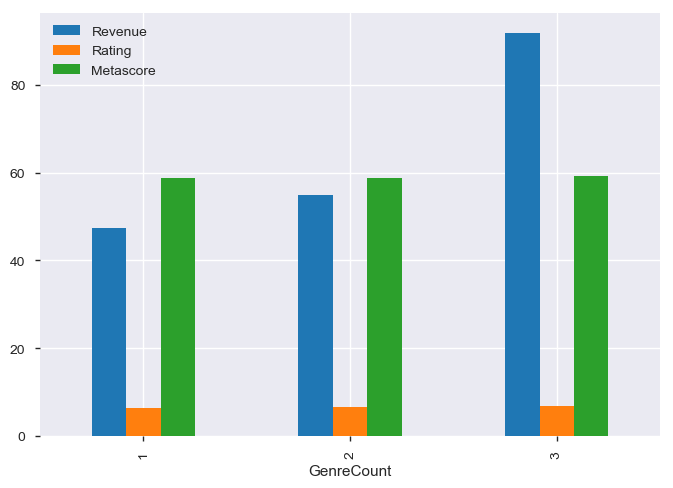

In [20]:
genre_count_df.plot.bar()

**Observation :** With Genre count of 3 the Revenue is almost doubled as compared to GenreCount 1 and 2. For Rating and Metascore the GenreCount seems not much significant impact

#### Q 1.2 : What is the impact of all Genre on Runtime

In [21]:
# Get list of unique Genre Columns
unique_genre_columns = list()
for col in merged_movies_df.columns: 
    if(col.startswith('Genre_')):
        unique_genre_columns.append(col)
print(unique_genre_columns)        

['Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History', 'Genre_Horror', 'Genre_Music', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport', 'Genre_Thriller', 'Genre_War', 'Genre_Western']


,Genre,MeanRunTime
2,Genre_Animation,98.142857
10,Genre_Horror,101.563025
4,Genre_Comedy,105.899642
7,Genre_Family,110.980392
17,Genre_Thriller,111.769231
11,Genre_Music,112.187500
14,Genre_Romance,113.007092
18,Genre_War,114.846154
13,Genre_Mystery,115.000000
5,Genre_Crime,115.413333


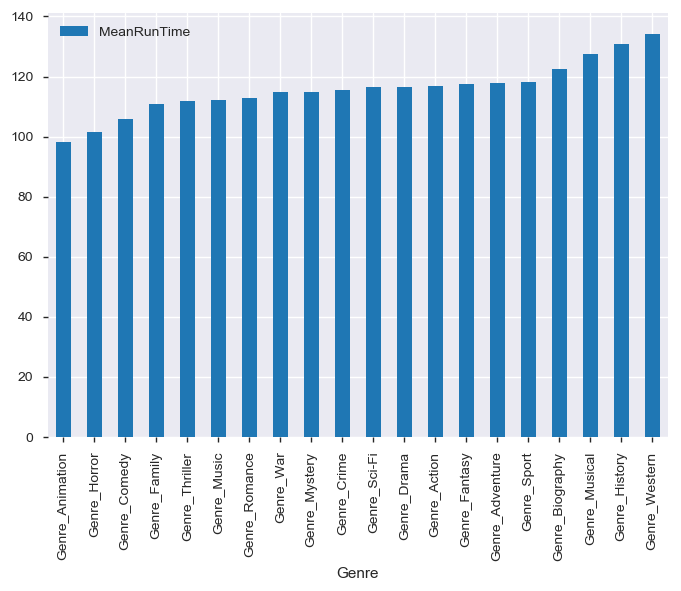

In [22]:
genre_mean_runtime_df = pd.DataFrame()

for coln in unique_genre_columns:
    each_genre_df = merged_movies_df[merged_movies_df[coln] == 1].groupby(coln)['Runtime'].mean()
    genre_mean_runtime_df = genre_mean_runtime_df.append(pd.Series([coln, each_genre_df[1]]), ignore_index=True)
    
genre_mean_runtime_df.columns = ['Genre', 'MeanRunTime']
genre_mean_runtime_df.sort_values(by=['MeanRunTime'], inplace=True, ascending=True)

genre_mean_runtime_df.plot.bar(x='Genre')
genre_mean_runtime_df

**Observation :** Average Runtime of Movies with Genre _Western_ is maximum around 134 mins followed by _History,  Musical_ etc.

#### Q 1.3 : What is the impact of all Genre on Rating

,Genre,MeanRating
10,Genre_Horror,6.089916
8,Genre_Fantasy,6.548515
17,Genre_Thriller,6.593333
0,Genre_Action,6.614521
4,Genre_Comedy,6.647670
7,Genre_Family,6.684314
14,Genre_Romance,6.685816
15,Genre_Sci-Fi,6.716667
19,Genre_Western,6.771429
1,Genre_Adventure,6.772201


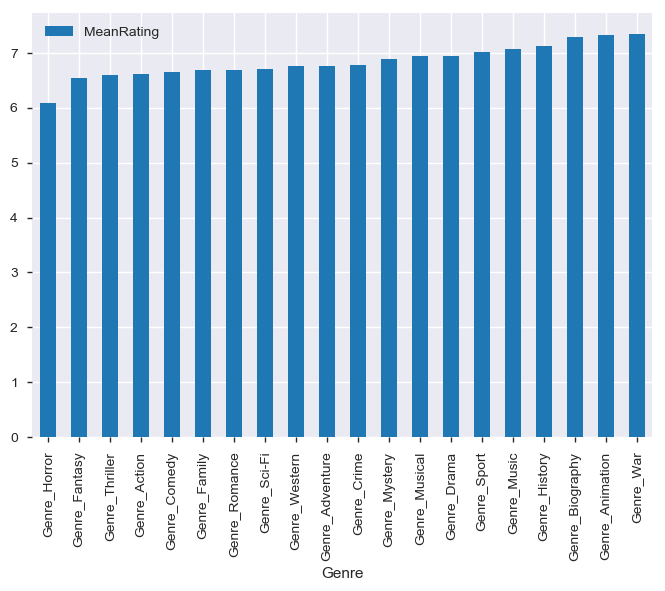

In [23]:
genre_mean_rating_df = pd.DataFrame()

for coln in unique_genre_columns:
    each_genre_df = merged_movies_df[merged_movies_df[coln] == 1].groupby(coln)['Rating'].mean()
    genre_mean_rating_df = genre_mean_rating_df.append(pd.Series([coln, each_genre_df[1]]), ignore_index=True)
    
genre_mean_rating_df.columns = ['Genre', 'MeanRating']
genre_mean_rating_df.sort_values(by=['MeanRating'], inplace=True, ascending=True)

genre_mean_rating_df.plot.bar(x='Genre')
genre_mean_rating_df

**Observation :** Surprisingly Genre _War_ and _Animation_ have higher mean rating as compared to others

#### Q 1.4 : What is the impact of all Genre on Votes

,Genre,TotalVotes
12,Genre_Musical,866881.0
19,Genre_Western,1796659.0
11,Genre_Music,1878969.0
16,Genre_Sport,2059836.0
18,Genre_War,2987189.0
9,Genre_History,4189695.0
7,Genre_Family,7495269.0
2,Genre_Animation,10199812.0
10,Genre_Horror,10466804.0
3,Genre_Biography,12308853.0


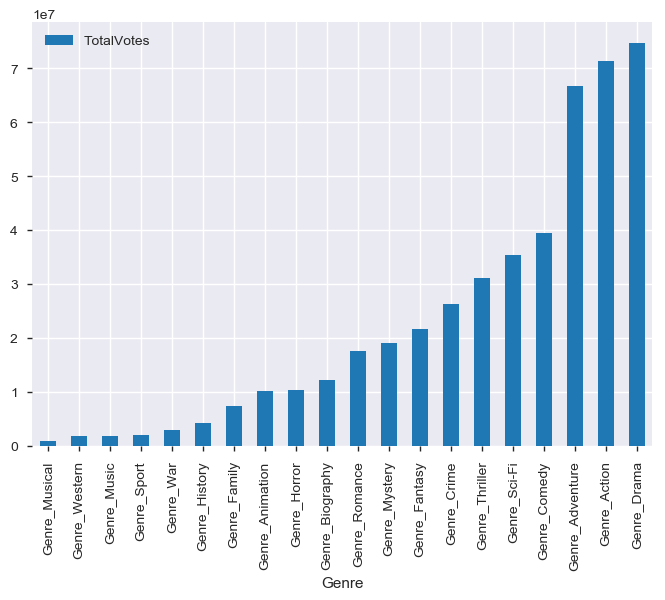

In [24]:
genre_total_votes_df = pd.DataFrame()

for coln in unique_genre_columns:
    each_genre_df = merged_movies_df[merged_movies_df[coln] == 1].groupby(coln)['Votes'].sum()
    genre_total_votes_df = genre_total_votes_df.append(pd.Series([coln, each_genre_df[1]]), ignore_index=True)
    
genre_total_votes_df.columns = ['Genre', 'TotalVotes']
genre_total_votes_df.sort_values(by=['TotalVotes'], inplace=True, ascending=True)

genre_total_votes_df.plot.bar(x='Genre')
genre_total_votes_df

**Observation :** Genre _Drama, Action, Adventure_ have leading votes

#### Q 1.5 : What is the impact of all Genre on Revenue

,Genre,TotalRevenue
12,Genre_Musical,408.210
19,Genre_Western,655.090
18,Genre_War,678.285
11,Genre_Music,754.035
16,Genre_Sport,1136.650
9,Genre_History,1519.975
3,Genre_Biography,4473.030
10,Genre_Horror,4661.200
13,Genre_Mystery,5677.605
14,Genre_Romance,6058.710


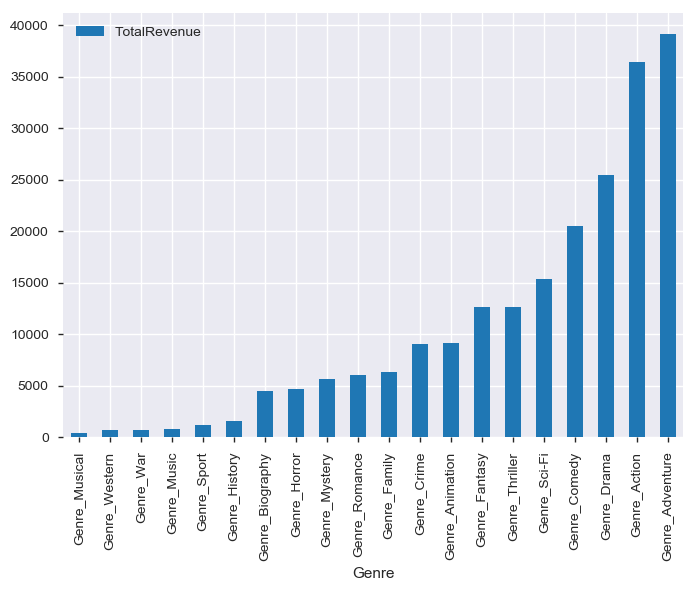

In [25]:
genre_total_revenue_df = pd.DataFrame()

for coln in unique_genre_columns:
    each_genre_df = merged_movies_df[merged_movies_df[coln] == 1].groupby(coln)['Revenue'].sum()
    genre_total_revenue_df = genre_total_revenue_df.append(pd.Series([coln, each_genre_df[1]]), ignore_index=True)
    
genre_total_revenue_df.columns = ['Genre', 'TotalRevenue']
genre_total_revenue_df.sort_values(by=['TotalRevenue'], inplace=True, ascending=True)

genre_total_revenue_df.plot.bar(x='Genre')
genre_total_revenue_df

**Observation :** Genre _Adventure, Action, Drama_ are leading revenue helpers in the industry

#### Q 1.6 : What is the impact of all Genre on Metascore

,Genre,MeanMetascore
0,Genre_Action,54.092409
19,Genre_Western,54.357143
8,Genre_Fantasy,55.272277
7,Genre_Family,55.696078
14,Genre_Romance,55.744681
10,Genre_Horror,56.945378
4,Genre_Comedy,57.679211
1,Genre_Adventure,57.741313
5,Genre_Crime,57.890000
15,Genre_Sci-Fi,58.291667


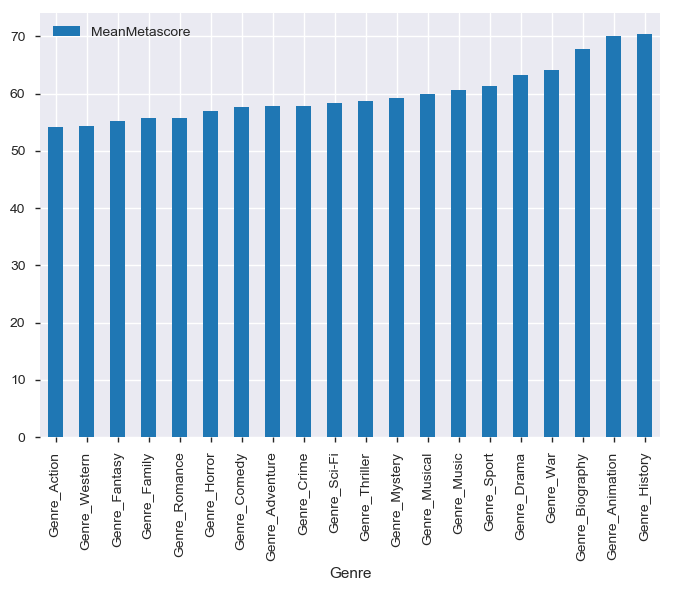

In [26]:
genre_mean_meatascore_df = pd.DataFrame()

for coln in unique_genre_columns:
    each_genre_df = merged_movies_df[merged_movies_df[coln] == 1].groupby(coln)['Metascore'].mean()
    genre_mean_meatascore_df = genre_mean_meatascore_df.append(pd.Series([coln, each_genre_df[1]]), ignore_index=True)
    
genre_mean_meatascore_df.columns = ['Genre', 'MeanMetascore']
genre_mean_meatascore_df.sort_values(by=['MeanMetascore'], inplace=True, ascending=True)

genre_mean_meatascore_df.plot.bar(x='Genre')
genre_mean_meatascore_df

**Observation :** Genre _History, Animation, Biography_ are leading critic reviews

#### Q 1.7 : Which Genre is most used for creating movies ?

Genre_Action       303
Genre_Adventure    259
Genre_Animation     49
Genre_Biography     81
Genre_Comedy       279
Genre_Crime        150
Genre_Drama        513
Genre_Family        51
Genre_Fantasy      101
Genre_History       29
Genre_Horror       119
Genre_Music         16
Genre_Musical        5
Genre_Mystery      106
Genre_Romance      141
Genre_Sci-Fi       120
Genre_Sport         18
Genre_Thriller     195
Genre_War           13
Genre_Western        7
dtype: int64


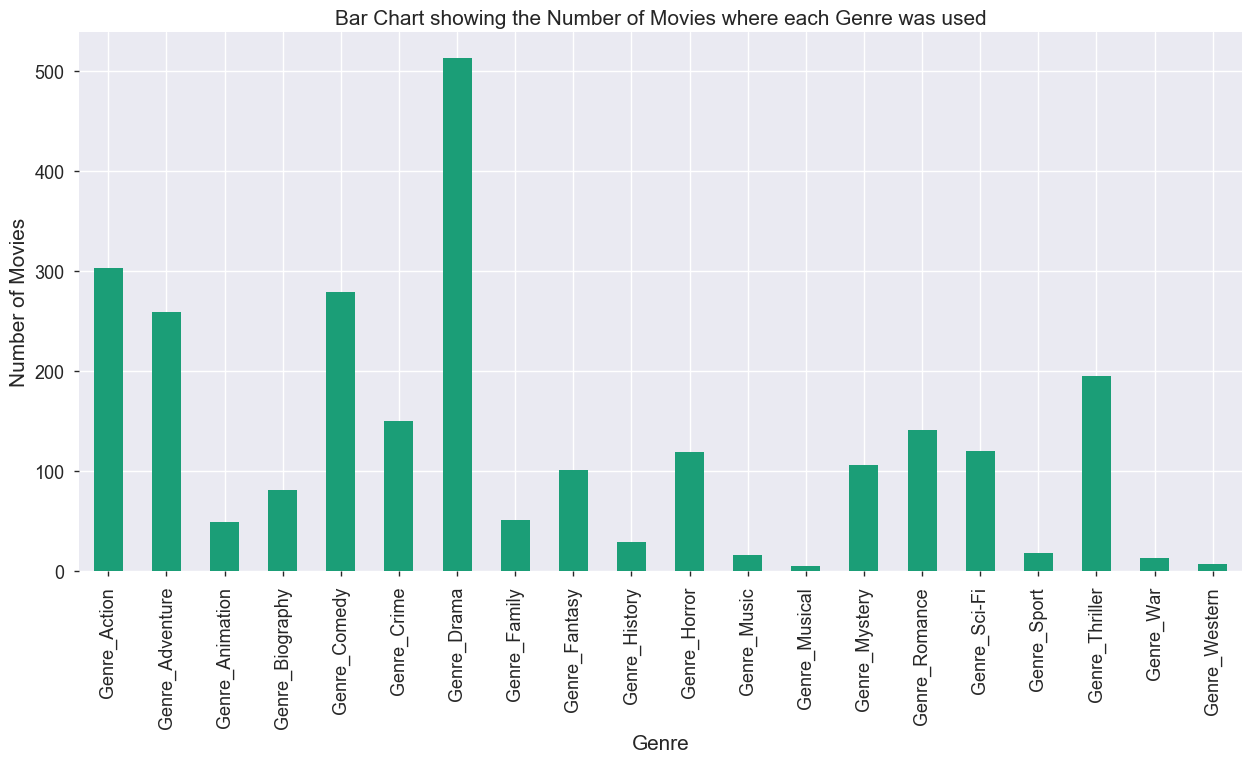

In [27]:
genre_df = merged_movies_df[unique_genre_columns]
print(genre_df.sum())
genre_df.sum().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Bar Chart showing the Number of Movies where each Genre was used', fontsize=15)
plt.savefig('Genre_noOfMovies_barchart.png') 

**Observation**: it is evident as per the dataset, **Drama** is the Movie Genre most produced followed by **Action, Comedy, Adventure, Thriller**

#### Q 2.1.1 : Who is most active Director  and which are the movies produced by them ?

In [28]:
most_active_directors = merged_movies_df['Director'].value_counts().head(15)
most_active_directors

Ridley Scott          8
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
Woody Allen           5
Denis Villeneuve      5
Antoine Fuqua         5
David Fincher         5
Peter Berg            5
Danny Boyle           5
Martin Scorsese       5
Justin Lin            5
Zack Snyder           5
Christopher Nolan     5
Name: Director, dtype: int64

#### Q 2.1 : Impact of chosing a director on Runtime ?

In [29]:
director_revenue_df = merged_movies_df.groupby('Director').agg({'Runtime': 'mean'}).sort_values('Runtime', ascending=False).head(10)
director_revenue_df

,Runtime
Director,
Abdellatif Kechiche,180.0
Aamir Khan,165.0
Andrea Arnold,163.0
James Cameron,162.0
Maren Ade,162.0
Rajkumar Hirani,161.5
Nitesh Tiwari,161.0
Andrew Dominik,160.0
S.S. Rajamouli,159.0


[Text(0, 0, 'Abdellatif Kechiche'),
 Text(0, 0, 'Aamir Khan'),
 Text(0, 0, 'Andrea Arnold'),
 Text(0, 0, 'James Cameron'),
 Text(0, 0, 'Maren Ade'),
 Text(0, 0, 'Rajkumar Hirani'),
 Text(0, 0, 'Nitesh Tiwari'),
 Text(0, 0, 'Andrew Dominik'),
 Text(0, 0, 'S.S. Rajamouli'),
 Text(0, 0, 'Hong-jin Na')]

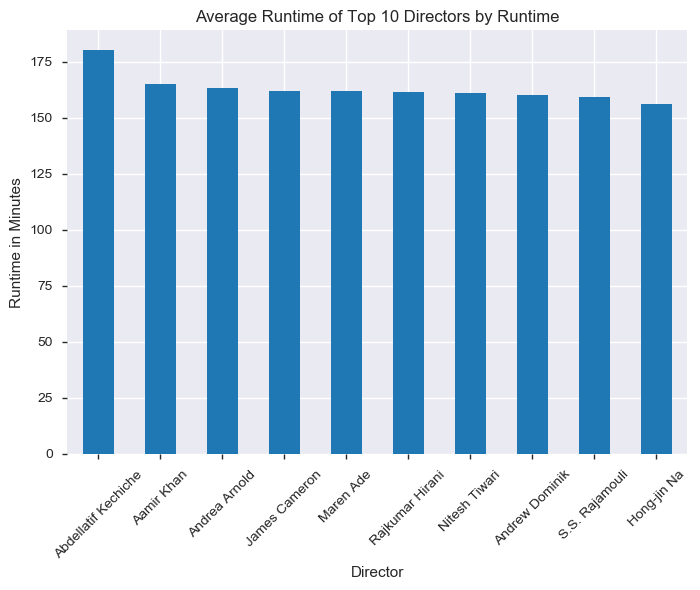

In [30]:
ax = director_revenue_df['Runtime'].plot.bar()
ax.set_ylabel('Runtime in Minutes')
ax.set_title('Average Runtime of Top 10 Directors by Runtime')
ax.set_xticklabels(director_revenue_df.index, rotation = 45)

**Observation :** Average Duration of movies directed by _Abdellatif Kechiche_ is slight more as compared to others but not much significant difference

#### Q 2.2 : Impact of chosing a director on Rating ?

In [31]:
director_rating_df = merged_movies_df.groupby('Director').agg({'Rating': 'mean'}).sort_values('Rating', ascending=False).head(10)
director_rating_df

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Makoto Shinkai,8.60
Olivier Nakache,8.60
Florian Henckel von Donnersmarck,8.50
Aamir Khan,8.50
Damien Chazelle,8.40
Naoko Yamada,8.40
Rajkumar Hirani,8.30


Text(0.5, 1.0, 'Average Runtime of Top 10 Directors by Rating')

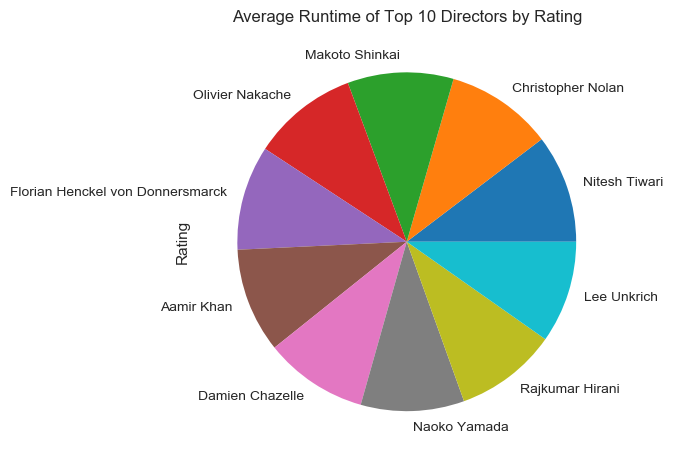

In [32]:
ax = director_rating_df['Rating'].plot.pie()
ax.set_title('Average Runtime of Top 10 Directors by Rating')


**Observation :** Average Rating of movies does not have much impact for any director

#### Q 2.3 : Impact of chosing a director on Votes received for  a movie ?

In [33]:
director_votes_df = merged_movies_df.groupby('Director').agg({'Votes': 'sum'}).sort_values('Votes', ascending=False).head(10)
director_votes_df

,Votes
Director,
Christopher Nolan,6559085
Martin Scorsese,2966524
Quentin Tarantino,2559586
David Fincher,2309652
Zack Snyder,2301544
J.J. Abrams,2174937
Ridley Scott,2080074
David Yates,2033854
Michael Bay,1706531


[Text(0, 0, 'Christopher Nolan'),
 Text(0, 0, 'Martin Scorsese'),
 Text(0, 0, 'Quentin Tarantino'),
 Text(0, 0, 'David Fincher'),
 Text(0, 0, 'Zack Snyder'),
 Text(0, 0, 'J.J. Abrams'),
 Text(0, 0, 'Ridley Scott'),
 Text(0, 0, 'David Yates'),
 Text(0, 0, 'Michael Bay'),
 Text(0, 0, 'Peter Jackson')]

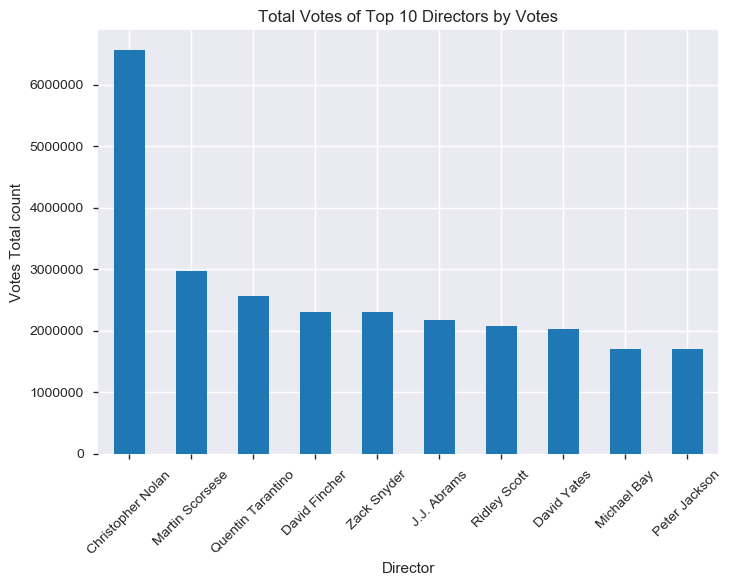

In [34]:
ax = director_votes_df['Votes'].plot.bar()
ax.set_ylabel('Votes Total count')
ax.set_title('Total Votes of Top 10 Directors by Votes')
ax.set_xticklabels(director_votes_df.index, rotation = 45)

**Observation :** Here we can clearly conclude that Movies Directed by _Christopher Nolan_ recieved more votes.

#### Q 2.4 : Impact of chosing a director on Revenue in industry.

In [32]:
director_revenue_df = merged_movies_df.groupby('Director').agg({'Revenue': 'sum'}).sort_values('Revenue', ascending=False).head(10)
director_revenue_df

,Revenue
Director,
J.J. Abrams,1683.45
David Yates,1630.51
Christopher Nolan,1515.09
Michael Bay,1421.32
Francis Lawrence,1299.81
Joss Whedon,1082.27
Jon Favreau,1025.60
Zack Snyder,975.74
Peter Jackson,860.45


[Text(0, 0, 'J.J. Abrams'),
 Text(0, 0, 'David Yates'),
 Text(0, 0, 'Christopher Nolan'),
 Text(0, 0, 'Michael Bay'),
 Text(0, 0, 'Francis Lawrence'),
 Text(0, 0, 'Joss Whedon'),
 Text(0, 0, 'Jon Favreau'),
 Text(0, 0, 'Zack Snyder'),
 Text(0, 0, 'Peter Jackson'),
 Text(0, 0, 'Gore Verbinski')]

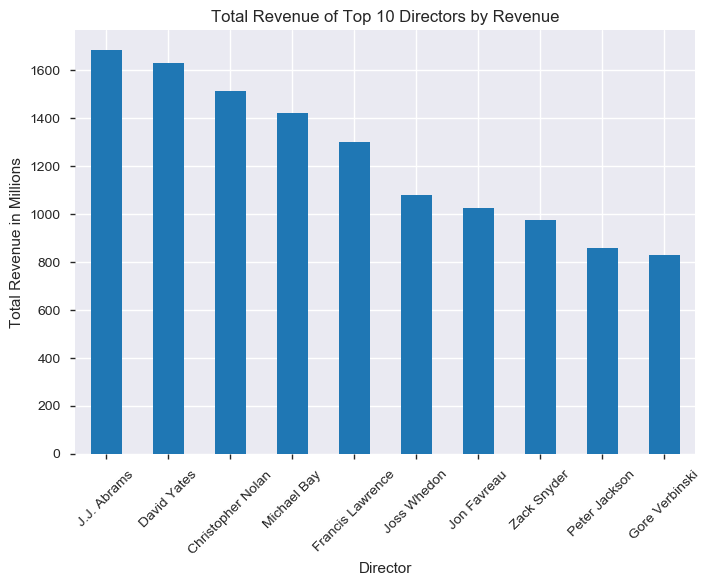

In [33]:
ax = director_revenue_df['Revenue'].plot.bar()
ax.set_ylabel('Total Revenue in Millions')
ax.set_title('Total Revenue of Top 10 Directors by Revenue')
ax.set_xticklabels(director_revenue_df.index, rotation = 45)

**Observation :** Directors JJ Abrams, David Yates, Chirstopher Nolan , Michael Bay help most in revenue generation

#### Q 2.5 : Impact of chosing a director on Metascore.

In [34]:
director_metascore_df = merged_movies_df.groupby('Director').agg({'Metascore': 'mean'}).sort_values('Metascore', ascending=False).head(10)
director_metascore_df

,Metascore
Director,
Barry Jenkins,99.0
Kenneth Lonergan,96.0
Todd Haynes,95.0
Kathryn Bigelow,94.5
Michael Goi,94.0
Tom McCarthy,93.0
Maren Ade,93.0
Lee Unkrich,92.0
Richard Linklater,91.5


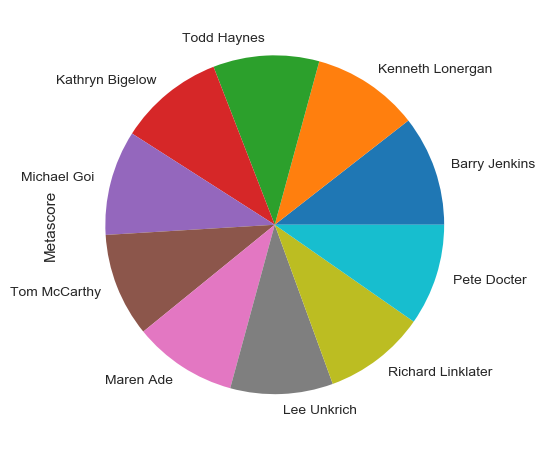

In [35]:
director_metascore_df['Metascore'].plot.pie()
#ax.set_ylabel('Average Metascore')
#ax.set_title('Average Metascore of Top 10 Directors by Metascore')
#ax.set_xticklabels(director_metascore_df.index, rotation = 45)

**Observation :** Not much significant difference in the Metascore receive from Critics

#### Q 3.1 : Each Year Average Runtime Values

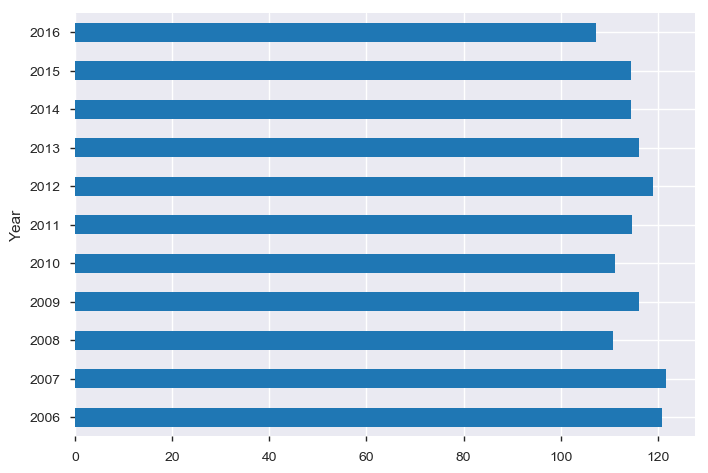

In [36]:
year_runtime_df = merged_movies_df.groupby('Year')['Runtime'].mean()
year_runtime_df.plot.barh()

**Observation :** Average runtime of movies is slightly getting reduced as per the trend.

#### Q 3.2 : Each Year Average Rating Values

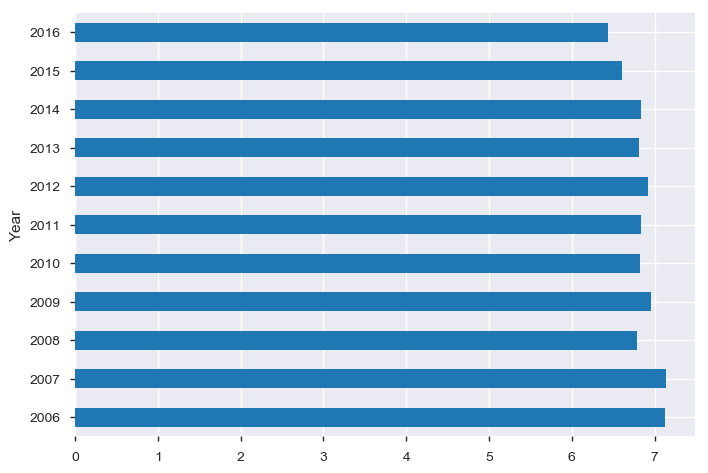

In [37]:
year_rating_df = merged_movies_df.groupby('Year')['Rating'].mean()
year_rating_df.plot.barh()

**Observation :** Average rating of movies is also slightly getting reduced as per the trend.

#### Q 3.3 : Each Year Average Votes Values

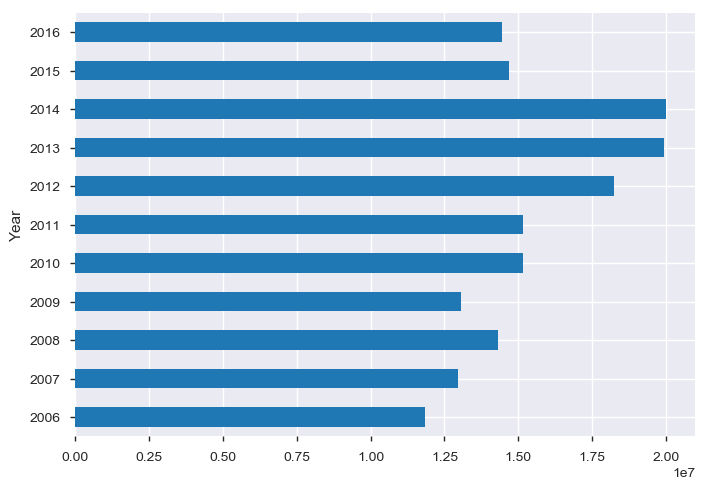

In [38]:
year_votes_df = merged_movies_df.groupby('Year')['Votes'].sum()
year_votes_df.plot.barh()

**Observation :** Based on the above chart we can say that most voting was done in year 2013 and 2014. The graph looks like normally distributed. The voting reduced in 2016

In [39]:
# Code for custom bar chart where each bar has the visible exact height
import pdb
def barlabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    #pdb.set_trace()
    for rect in rects:
        height = rect.get_height()
        #pdb.set_trace()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def plotCustomBarChart(label,xAxisList, yAxisList, yLabel, title, figW, figH, imageName):
    x = np.arange(len(xAxisList))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(figW,figH))
    rects1 = ax.bar(x - width/2, yAxisList, width, label=label)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(xAxisList)
    ax.legend()
    barlabel(rects1, ax)
    fig.tight_layout()
    plt.savefig(imageName)
    plt.show()
    

#### Q 3.4 : What are number of movies produced each year

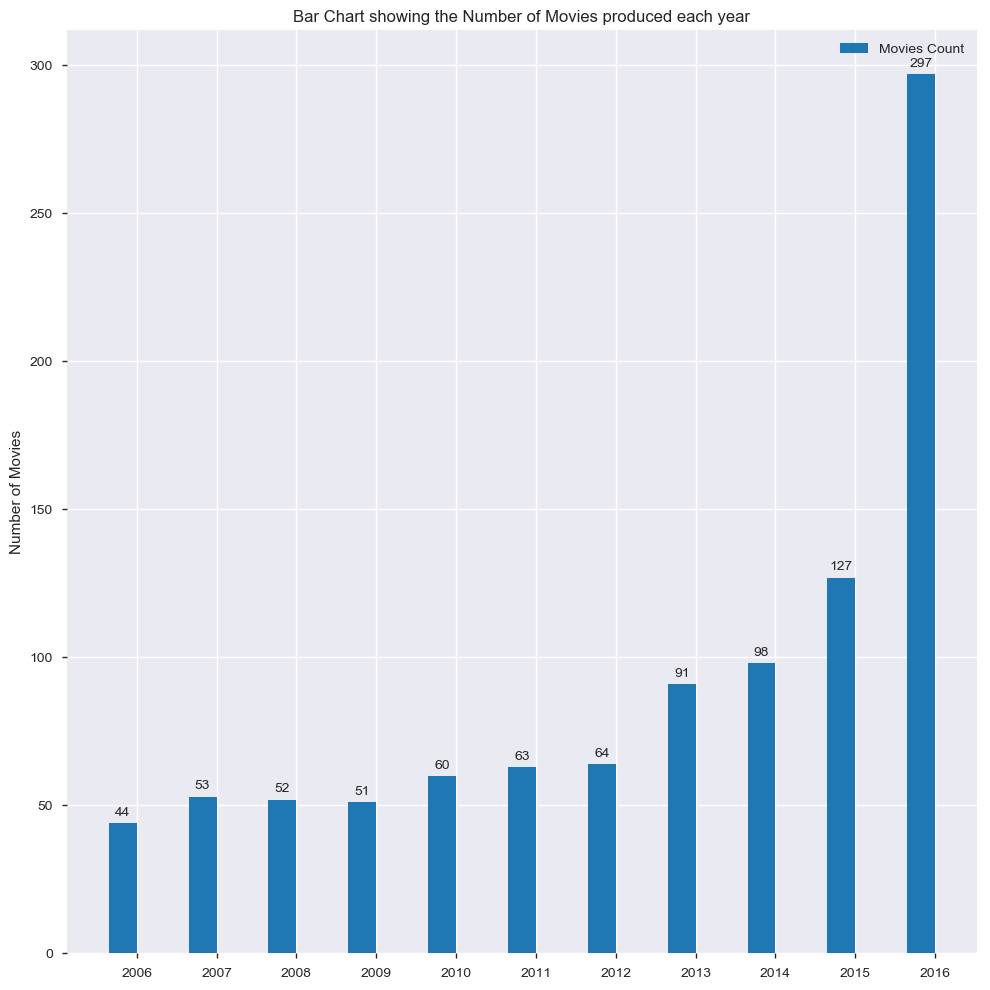

In [41]:
movies_grpByYear = merged_movies_df.groupby(['Year']).agg({'Title' : ['count'] })
yearList = movies_grpByYear.index.tolist()
countList = movies_grpByYear.iloc[:,0].tolist()

plotCustomBarChart("Movies Count", yearList, countList, 'Number of Movies', 'Bar Chart showing the Number of Movies produced each year',10,10, 'movies_produced_each_year.png')

**Observation** : The trend for movies production is increasing year on year

#### Q 3.5 : Revenue of movies each year

C:\Users\vaibhav.javadekar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


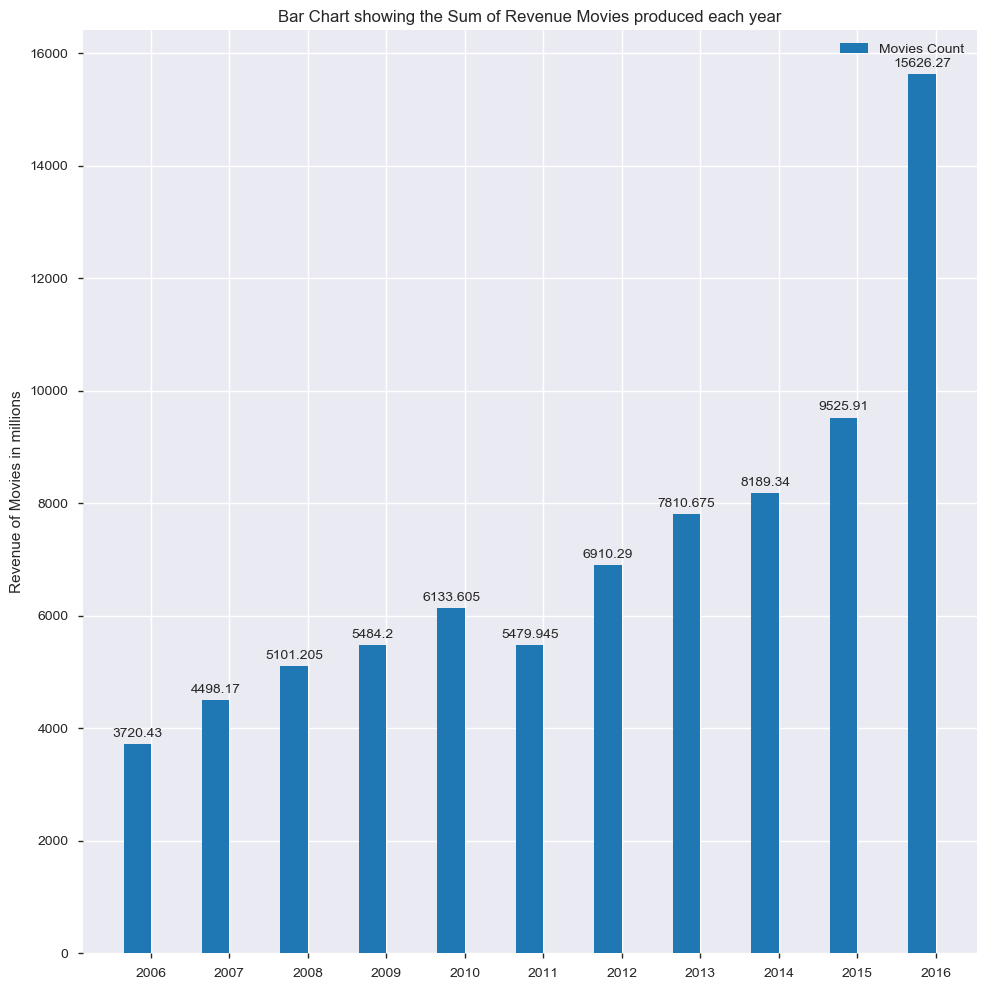

In [42]:
top_movies_yearwise = merged_movies_df[['Revenue','Year']]
rev_movies_grpByYear = top_movies_yearwise.groupby(['Year']).agg({'Revenue' : {'total':'sum'}})

#print(rev_movies_grpByYear)
yearList = rev_movies_grpByYear.index.tolist()
sumList = rev_movies_grpByYear['Revenue']['total'].apply(lambda x: round(x, 3)).tolist()

plotCustomBarChart("Movies Count", yearList, sumList, 'Revenue of Movies in millions', 'Bar Chart showing the Sum of Revenue Movies produced each year',10,10, 'revenue_of_movies_each_year.png')

**Observation** : Revenue of movies in the industry is increasing year on year

#### Q 3.6 : Average Metascore recieved each year

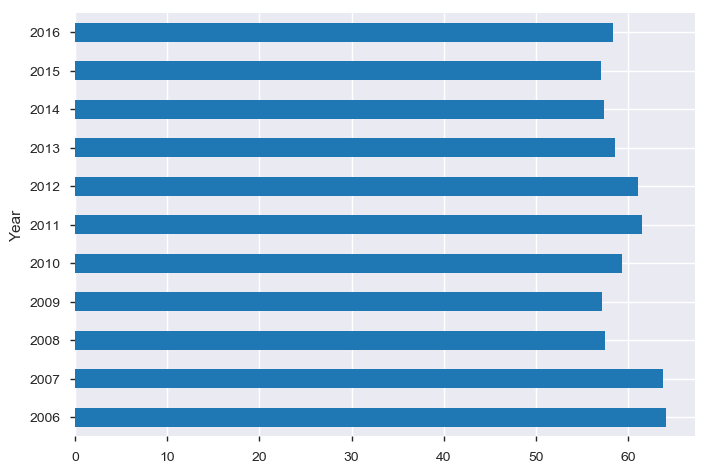

In [38]:
year_metascore_df = merged_movies_df.groupby('Year')['Metascore'].mean()
year_metascore_df.plot.barh()

**Observation :** Even metascroes are also decreasing slightly year on year

#### Q 4.1 : Which Duration of movies produced more revenue ?

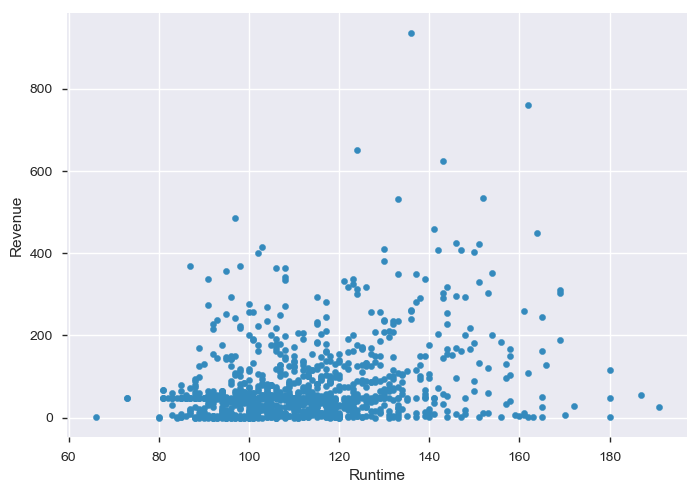

In [36]:
# Q : What duration of movies produce more revenue ?
merged_movies_df.plot.scatter(x='Runtime', y='Revenue')

By Looking at this scatter plot, we understand that length of movies is mostly concentrated between 100 to 120... Keeping that in mind we will categorize the Runtime into 4 intervals as below
- Short  - 60 to 100 mins 
- Medium - 100 to 120 mins
- Moderately Long - 120 to 160 mins
- Long - 160 to 190 mins

In [39]:
#runtime_revenue = merged_movies_df.groupby
runtime_labels = ['Short', 'Medium', 'Moderately Long', 'Long']
merged_movies_df['Runtime_Interval'] = pd.cut(merged_movies_df.Runtime, [60,100,120,160,190], labels=runtime_labels, include_lowest=True)
merged_movies_df.head()


,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,GenreCount,Runtime_Interval
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,Moderately Long
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3,Moderately Long
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,Medium
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,Medium
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,Moderately Long


Runtime_Interval
Short              15723.090
Medium             27786.120
Moderately Long    31683.915
Long                3261.885
Name: Revenue, dtype: float64


Text(0.5, 1.02, 'Revenue Sum by Runtime Interval')

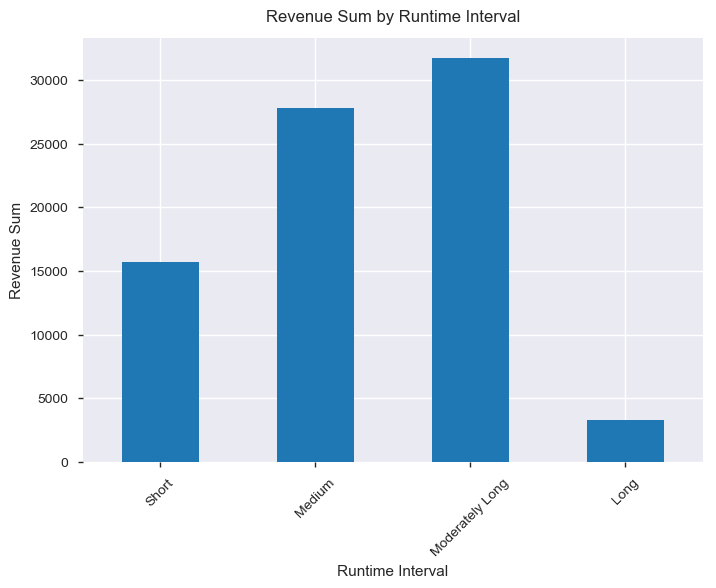

In [40]:
runtime_revenue = merged_movies_df.groupby('Runtime_Interval')['Revenue'].sum()
print(runtime_revenue)
ax = runtime_revenue.plot.bar()
ax.set_ylabel('Revenue Sum');
ax.set_xlabel('Runtime Interval')
ax.set_xticklabels(runtime_revenue.index, rotation = 45);
ax.set_title('Revenue Sum by Runtime Interval', y=1.02)

**Obeservation :** Medium and Moderately Length movies tend to produce more Revenue

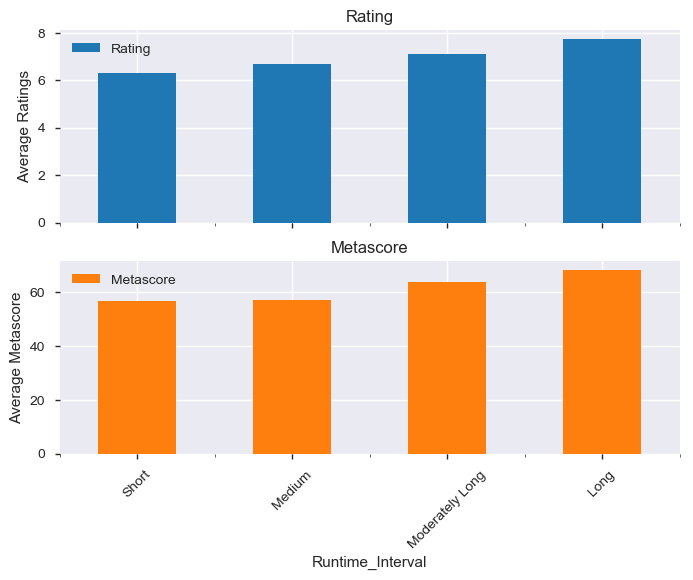

In [216]:
runtime_rating_metascore = merged_movies_df.groupby('Runtime_Interval')['Rating', 'Metascore'].mean()
ax1, ax2 = runtime_rating_metascore.plot.bar(subplots=True)
ax1.set_ylabel('Average Ratings');
ax2.set_ylabel('Average Metascore');
ax.set_xlabel('Runtime Interval')
ax2.set_xticklabels(runtime_revenue.index, rotation = 45);


**Observation** : Based on the above bar chart we can say the if the move length is _Medium_ or _Moderately Long_  i.e. between 100 to 160 then there are high chances of generating more revenue.
Ratings and Metascores both are high when movie length is _Long_

#### Q 4.2 :  What is the relationship between Revenue, Rating anfd Metascore of movies ?

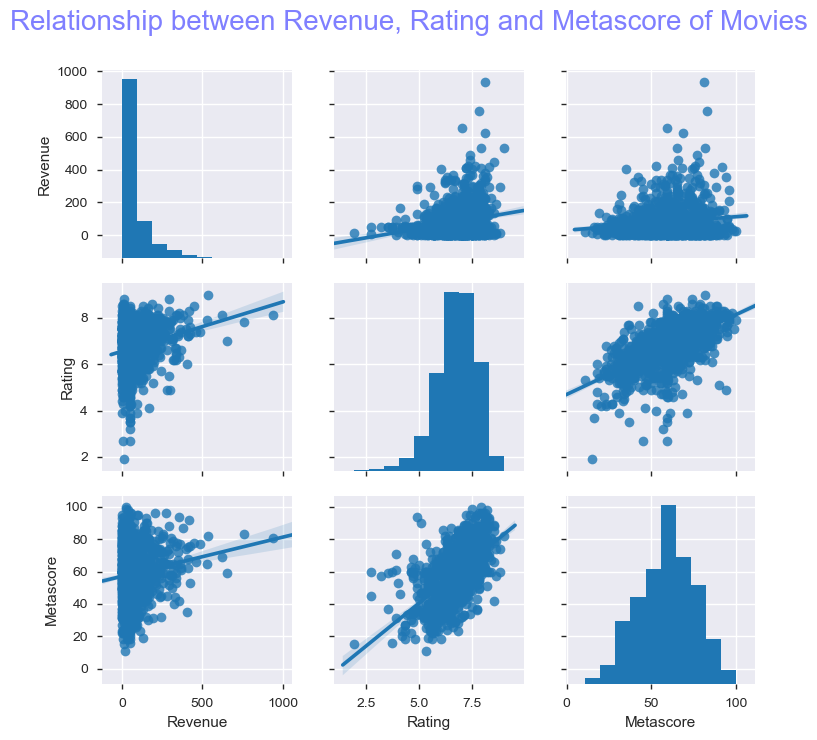

In [220]:
a=sns.pairplot(merged_movies_df, palette="muted",height=2.5,vars=['Revenue', 'Rating', 'Metascore'], kind='reg')
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5)
plt.subplots_adjust(top=0.9);

Text(0.5, 1.0, 'Correlation between features')

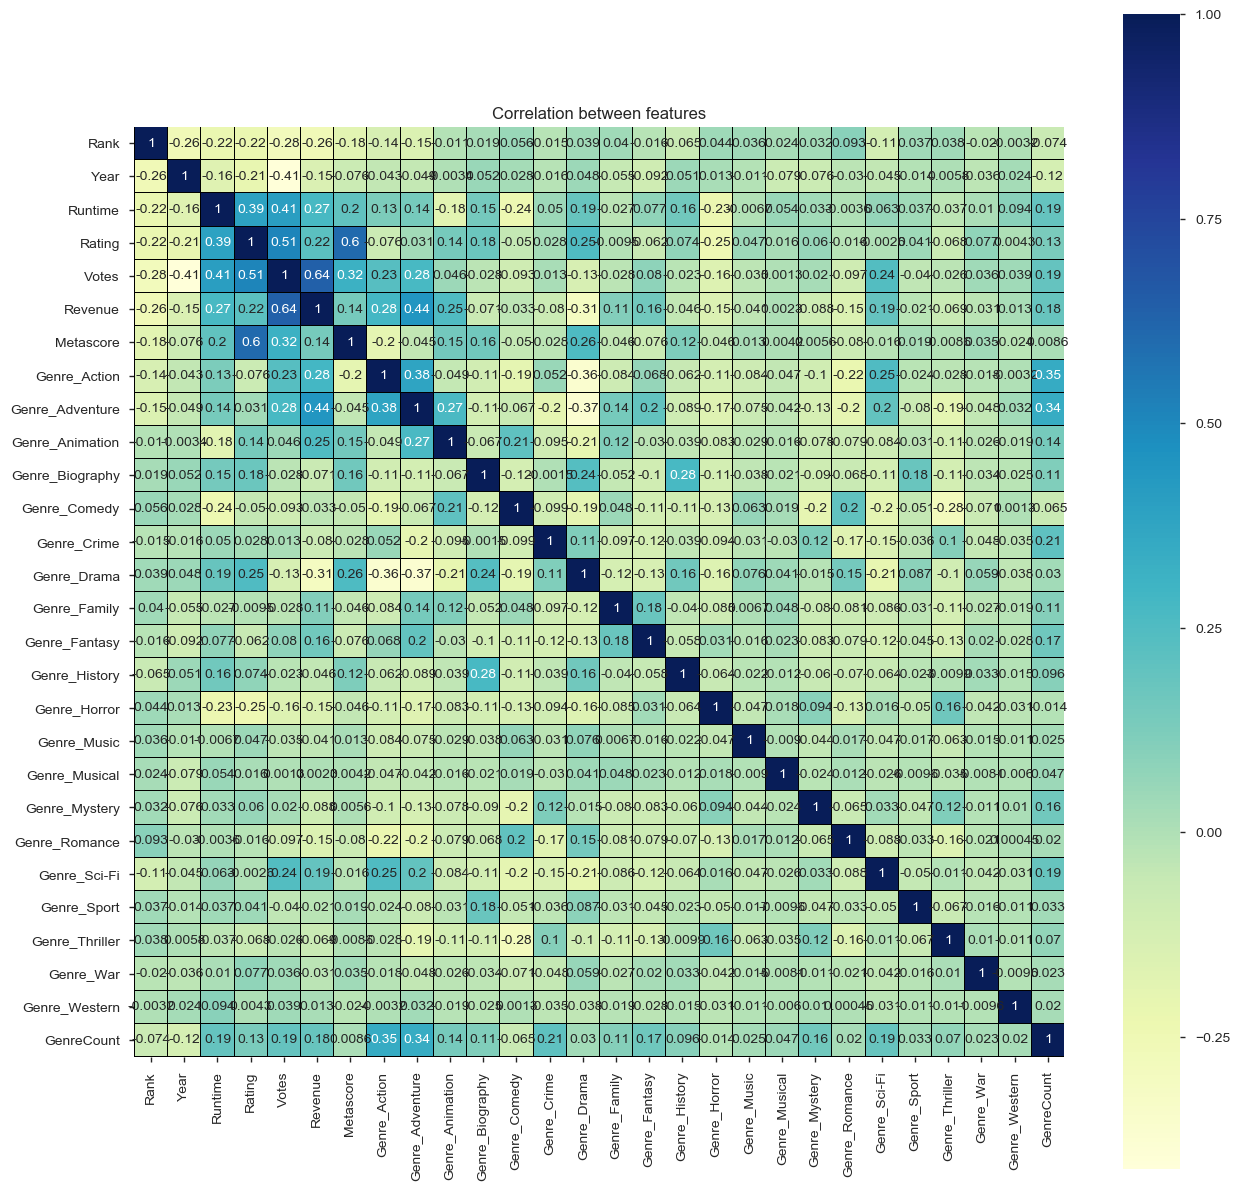

In [221]:
corr = merged_movies_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=1.0,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation :**
Surprisingly **Rank** column does not have good correlation with Runtime, Rating, Votes, Revenue, Metascore columns hence we shall ignore that column. But there seems to be some positive correlation within other columns.
E.g.
- Votes and Revenue have good correlation - 0.64
- Rating and Metascore have good correlation - 0.6
- Rating and Votes have good correlation - 0.51
- Runtime and Votes also have good correlation - 0.41
- Runtime and Rating also have good correlation - 0.39
- Votes and Metascore have good correlation - 0.32
- Runtime and Revenue have good correlation - 0.27

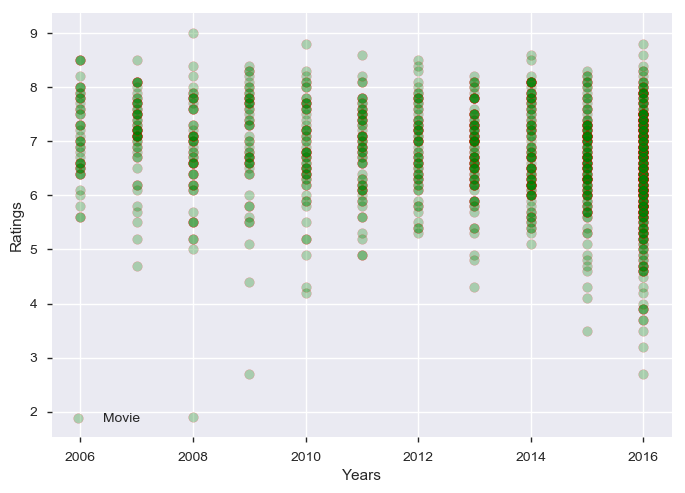

In [68]:
#scatter plot about movie and their ratings between 2006 - 2016
plt.scatter(merged_movies_df.Year, merged_movies_df.Rating, alpha = 0.28, label = "Movie", color = "green", edgecolors='red')
plt.xlabel("Years")
plt.ylabel("Ratings")
plt.legend(loc = "lower left")
plt.show()

**Conclusion:**

**Genre**
- Movie with 3 Genre combination has Revenue double as compared to combination with GenreCount 1 and 2. For Rating and Metascore the GenreCount seems not much significant impact. So it means that combination of more Genres can probably produce more revenue.
- Average Runtime of Movies with **Genre Western** is maximum around 134 mins followed by History, Musical etc.
- Surprisingly **Genre War** and **Animation** have higher Average rating as compared to others
- Genre Drama, Action, Adventure movies have recieved most votes
- Genre Adventure, Action, Drama are leading revenue generators in the industry
- Genre History, Animation, Biography containing movies have leading critic metascores
- Drama Movie Genre most produced followed by Action, Comedy, Adventure, Thriller

**Director**
- Average Duration of movies directed by Abdellatif Kechiche is slight more as compared to others but not much significant difference
- Average Rating of movies does not have much impact for any director
- Movies Directed by Abdellatif Kechiche recieved more votes.
- Directors JJ Abrams, David Yates, Chirstopher Nolan , Michael Bay help most in revenue generation

**Runtime** | **Revenue** | **Votes** | **Metascore**
- Average runtime of movies is slightly getting reduced as per the trend in 2016
- Most voting was done in year 2013 and 2014. The graph looks like normally distributed. The voting reduced in 2016
- Even metascroes are also decreasing slightly year on year
- The trend for movies production is increasing year on year
- Revenue of movies in the industry is increasing year on year
- If the move length is Medium or Moderately Long i.e. between 100 to 160 then there are high chances of generating more revenue. Ratings and Metascores both are high when movie length is Long
- Surprisingly Rank column does not have good correlation with Runtime, Rating, Votes, Revenue, Metascore columns hence we shall ignore that column. 
    But there seems to be some positive correlation within other columns. E.g.
        Votes and Revenue have good correlation - 0.64
        Rating and Metascore have good correlation - 0.6
        Rating and Votes have good correlation - 0.51
        Runtime and Votes also have good correlation - 0.41
        Runtime and Rating also have good correlation - 0.39
        Votes and Metascore have good correlation - 0.32
        Runtime and Revenue have good correlation - 0.27

**Actionable Insight**
    - Produce movies with runtime duration as Medium or Moderately Long
    - Produce movies with 3 or more Genre in a single movie
    - Produce movies with Active directors E.g. If we check the outcome of 2.2(Rating), 2.3(Votes), 2.4(Revenue) and 2.1.1(Active Directors) then we get the common name 'Chirtopher Nolan'
    - Since we see that movies production is on rise every year there is lot of competetion in the industry, so It is advised to produce multiple movies in year insted of waiting for 1 big single movie
